<a href="https://colab.research.google.com/github/CD-AC/DataScience-Sales_Prediction/blob/main/ML_CountVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

4


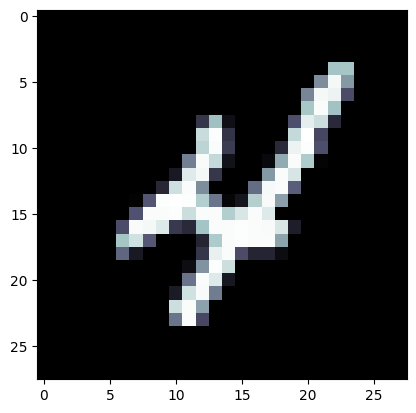

In [13]:
x, y = mnist.data, mnist.target
rang_num = x.iloc[9]
rang_num_resh = rang_num.values.reshape(28, 28)

plt.imshow(rang_num_resh, cmap= 'bone')
plt.axis = False
plt.show

print(y.iloc[9])

In [17]:
y = y.astype(np.uint8)

In [19]:
x_train, y_train = x[:60000], y[:60000]
x_test, y_test = x[60000:], y[60000:]
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([rang_num])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=uint8)

In [27]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)
confusion_m = confusion_matrix(y_train, y_train_pred)
confusion_m

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

In [29]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train, cv= 3)
confusion_m_forest = confusion_matrix(y_train,y_train_pred_forest)
confusion_m_forest

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6635,   43,   11,   13,    5,    6,   13,   12,    3],
       [  27,   12, 5749,   30,   32,    4,   20,   37,   41,    6],
       [   7,    7,   91, 5811,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5645,    0,   28,   14,   17,   98],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [  26,   11,    5,    0,   12,   46, 5803,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   52,   26,   52,   27,    5, 5525,   76],
       [  21,   10,   14,   76,   75,   15,    3,   58,   45, 5632]])